In [39]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [40]:
students = pd.read_csv('/Users/spencerfogelman/Downloads/xAPI-Edu-Data.csv')

In [41]:
students.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


# Univariate Exploration

In [42]:
students['gender'].value_counts()

M    305
F    175
Name: gender, dtype: int64

In [43]:
students['Relation'].value_counts()

Father    283
Mum       197
Name: Relation, dtype: int64

(-0.1, 50.0]     254
(50.0, 100.0]    226
Name: raisedhands, dtype: int64


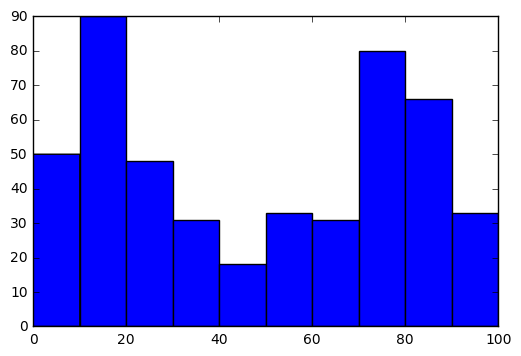

In [44]:
plt.hist(students['raisedhands'])
raisedhands_cat = pd.cut(students['raisedhands'], bins=2)
print(raisedhands_cat.value_counts())
plt.show()

In [45]:
students['Many_Raised_Hands']=np.where(students['raisedhands']>=50, 1, 0)
students['Few_Raised_Hands'] = np.where(students['raisedhands']<50, 1, 0)
print(students.head())

  gender NationalITy PlaceofBirth     StageID GradeID SectionID Topic  \
0      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
1      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
2      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
3      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
4      M          KW       KuwaIT  lowerlevel    G-04         A    IT   

  Semester Relation  raisedhands  VisITedResources  AnnouncementsView  \
0        F   Father           15                16                  2   
1        F   Father           20                20                  3   
2        F   Father           10                 7                  0   
3        F   Father           30                25                  5   
4        F   Father           40                50                 12   

   Discussion ParentAnsweringSurvey ParentschoolSatisfaction  \
0          20                   Yes                     Go

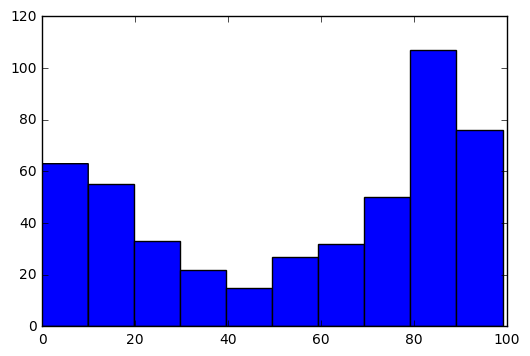

In [46]:
plt.hist(students['VisITedResources'])
plt.show()

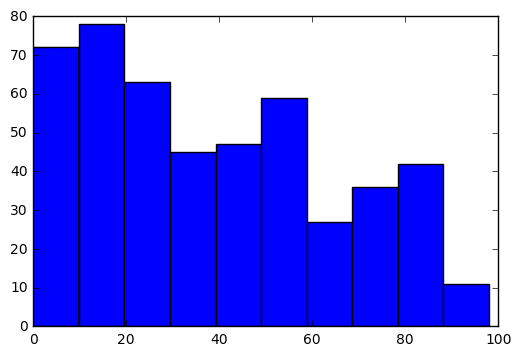

In [47]:
plt.hist(students['AnnouncementsView'])
plt.show()

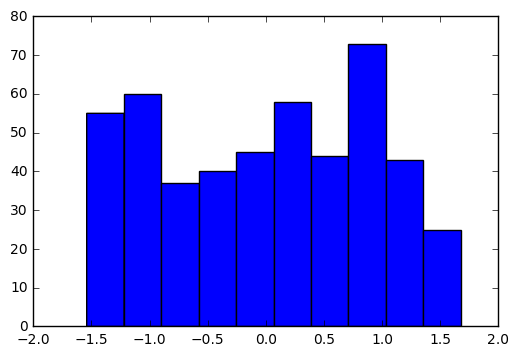

                             raisedhands  VisITedResources  AnnouncementsView  \
raisedhands                     1.000000          0.691572           0.643918   
VisITedResources                0.691572          1.000000           0.594500   
AnnouncementsView               0.643918          0.594500           1.000000   
Discussion                      0.339386          0.243292           0.417290   
Many_Raised_Hands               0.913120          0.640720           0.575550   
Few_Raised_Hands               -0.913120         -0.640720          -0.575550   
resources_announcements_avg     0.747848          0.892889           0.892889   

                             Discussion  Many_Raised_Hands  Few_Raised_Hands  \
raisedhands                    0.339386           0.913120         -0.913120   
VisITedResources               0.243292           0.640720         -0.640720   
AnnouncementsView              0.417290           0.575550         -0.575550   
Discussion                     

In [48]:
means = students[['VisITedResources', 'AnnouncementsView' ]].mean(axis=0)
stds = students[['VisITedResources', 'AnnouncementsView']].std(axis=0)
students['resources_announcements_avg'] = ((students[['VisITedResources', 'AnnouncementsView']] - means) / stds).mean(axis=1)
plt.hist(students['resources_announcements_avg'])
plt.show()
print(students.corr())

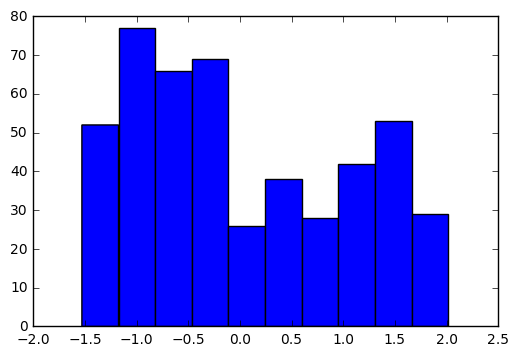

In [49]:
students['Discussion'] = (students['Discussion'] - students['Discussion'].mean()) / students['Discussion'].std()
plt.hist(students['Discussion'])
plt.show()

In [50]:
students['Class'].value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

In [51]:
students.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Many_Raised_Hands,Few_Raised_Hands,resources_announcements_avg
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,-0.842447,Yes,Good,Under-7,M,0,1,-1.261305
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,-0.661535,Yes,Good,Under-7,M,0,1,-1.182056
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,-0.480623,No,Bad,Above-7,L,0,1,-1.434917
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,-0.299711,No,Bad,Above-7,L,0,1,-1.068904
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,0.243025,No,Bad,Above-7,M,0,1,-0.559509


# Continous Bivariate Exploration

                             raisedhands  VisITedResources  AnnouncementsView  \
raisedhands                     1.000000          0.691572           0.643918   
VisITedResources                0.691572          1.000000           0.594500   
AnnouncementsView               0.643918          0.594500           1.000000   
Discussion                      0.339386          0.243292           0.417290   
Many_Raised_Hands               0.913120          0.640720           0.575550   
Few_Raised_Hands               -0.913120         -0.640720          -0.575550   
resources_announcements_avg     0.747848          0.892889           0.892889   

                             Discussion  Many_Raised_Hands  Few_Raised_Hands  \
raisedhands                    0.339386           0.913120         -0.913120   
VisITedResources               0.243292           0.640720         -0.640720   
AnnouncementsView              0.417290           0.575550         -0.575550   
Discussion                     

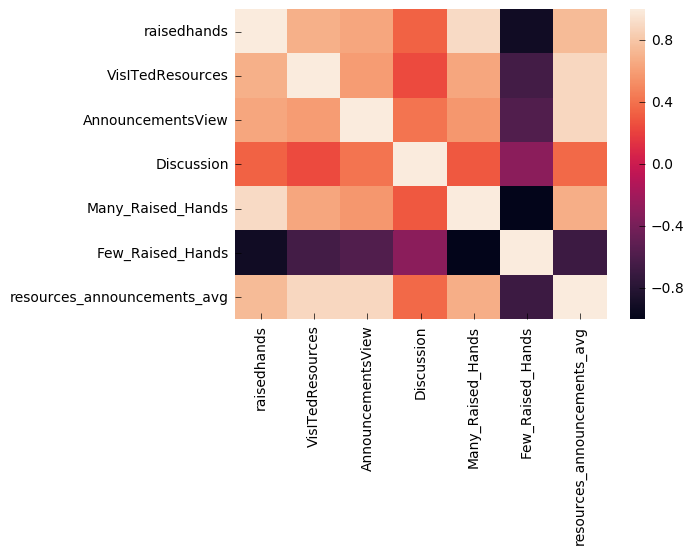

In [52]:
corrmat = students.corr()
print(corrmat)
sns.heatmap(corrmat)
plt.show()

# Categorial + Continous

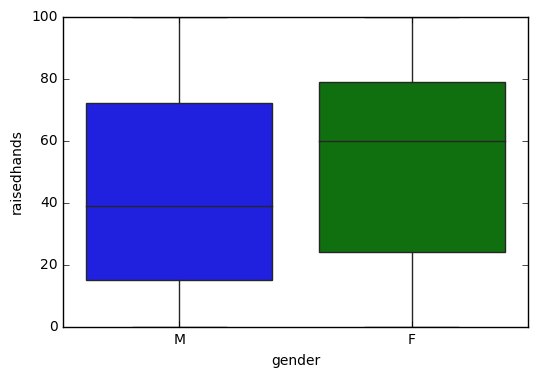

In [53]:
sns.boxplot(x='gender', y='raisedhands', data=students)
plt.show()

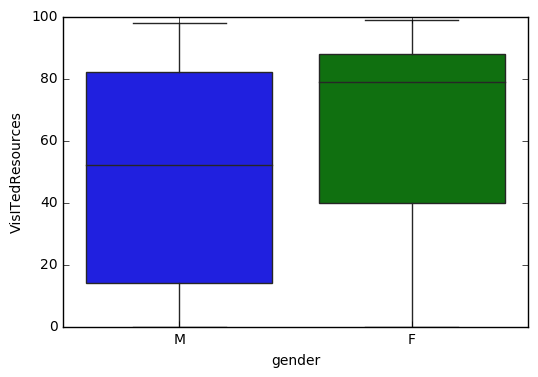

In [54]:
sns.boxplot(x='gender', y='VisITedResources', data=students)
plt.show()

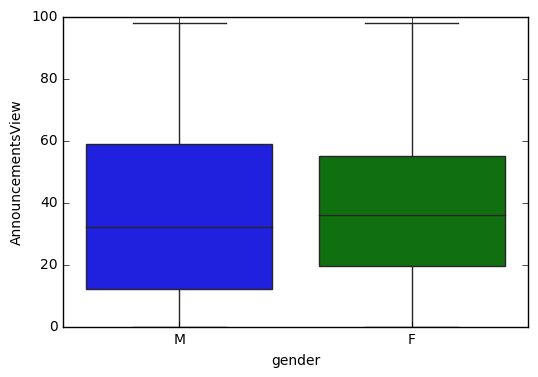

In [55]:
sns.boxplot(x='gender', y='AnnouncementsView', data=students)
plt.show()

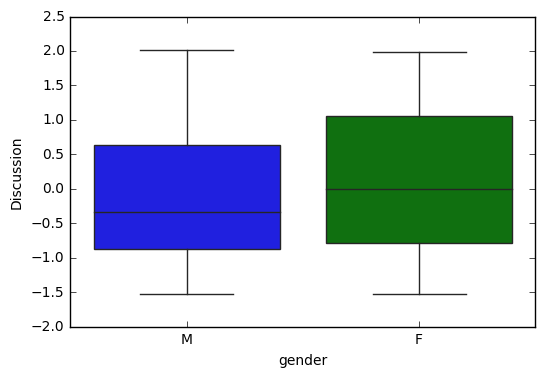

In [56]:
sns.boxplot(x='gender', y='Discussion', data=students)
plt.show()

In [57]:
students_gender = students[['gender','raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion' ]]
students_gender_long = pd.melt(students_gender, id_vars=['gender'])
print(students_gender_long.head())

  gender     variable  value
0      M  raisedhands   15.0
1      M  raisedhands   20.0
2      M  raisedhands   10.0
3      M  raisedhands   30.0
4      M  raisedhands   40.0


/Users/spencerfogelman/anaconda/lib/python3.5/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


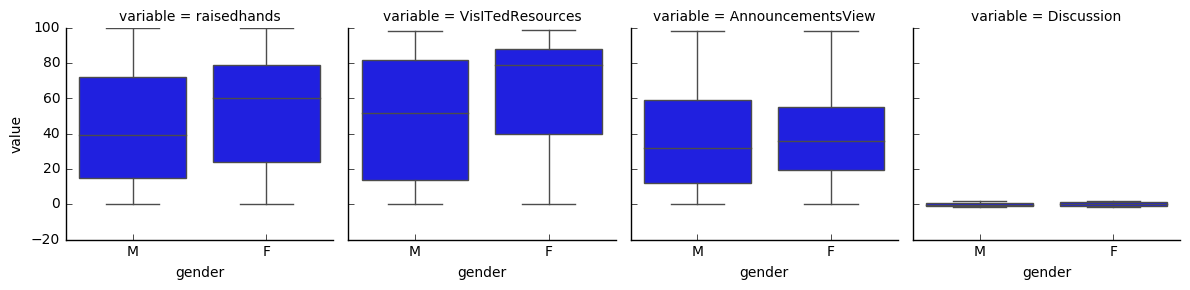

In [58]:
g = sns.FacetGrid(students_gender_long, col="variable")
g = g.map(sns.boxplot, "gender", "value")
plt.show()

In [59]:
for col in students.loc[:,'raisedhands':'Discussion'].columns:
    print(col)
    print(stats.ttest_ind(
        students[students['gender'] == 'M'][col],
        students[students['gender'] == 'F'][col]
    ))

raisedhands
Ttest_indResult(statistic=-3.3165221359412342, pvalue=0.0009808734351462534)
VisITedResources
Ttest_indResult(statistic=-4.71779860450687, pvalue=3.1346741830998905e-06)
AnnouncementsView
Ttest_indResult(statistic=-1.1414859402754376, pvalue=0.25423927937055196)
Discussion
Ttest_indResult(statistic=-2.7478526810766906, pvalue=0.006225461285887796)


In [60]:
students_relation = students[['Relation','raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion' ]]
students_relation_long = pd.melt(students_relation, id_vars=['Relation'])
print(students_relation_long.head())

  Relation     variable  value
0   Father  raisedhands   15.0
1   Father  raisedhands   20.0
2   Father  raisedhands   10.0
3   Father  raisedhands   30.0
4   Father  raisedhands   40.0


/Users/spencerfogelman/anaconda/lib/python3.5/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


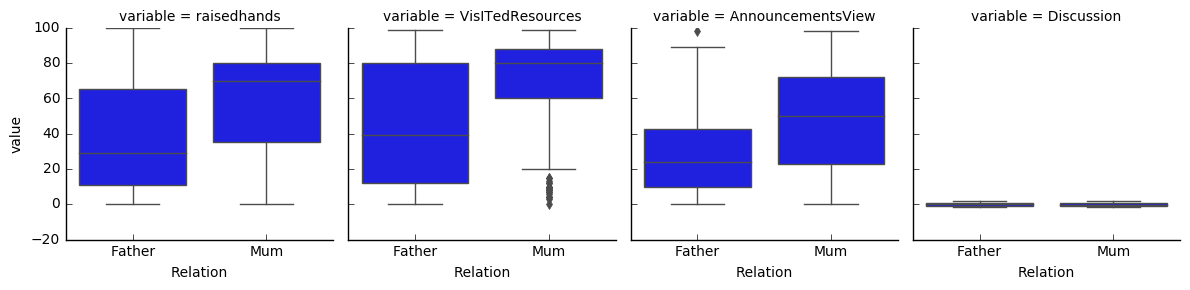

In [61]:
g = sns.FacetGrid(students_relation_long, col="variable")
g = g.map(sns.boxplot, "Relation", "value")
plt.show()

In [62]:
for col in students.loc[:,'raisedhands':'Discussion'].columns:
    print(col)
    print(stats.ttest_ind(
        students[students['Relation'] == 'Father'][col],
        students[students['Relation'] == 'Mum'][col]
    ))

raisedhands
Ttest_indResult(statistic=-8.55076704363199, pvalue=1.663972340287496e-16)
VisITedResources
Ttest_indResult(statistic=-8.442872220285047, pvalue=3.7298741612160346e-16)
AnnouncementsView
Ttest_indResult(statistic=-7.891382147237614, pvalue=2.0558275488746067e-14)
Discussion
Ttest_indResult(statistic=-0.584385879020266, pvalue=0.5592364237758201)


# Categorical Bivariate

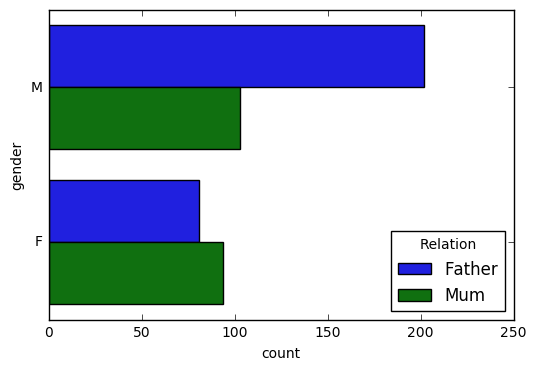

In [63]:
students_cat = students[['gender', 'Relation']]
sns.countplot(y='gender', hue='Relation', data=students_cat)
plt.show()

In [64]:
counttable = pd.crosstab(students_cat['gender'], students_cat['Relation'])
print(counttable)

Relation  Father  Mum
gender               
F             81   94
M            202  103


In [65]:
print(stats.chisquare(counttable, axis=None))

Power_divergenceResult(statistic=76.75, pvalue=1.5274971693838403e-16)


# Feature Engineering

In [66]:
features = pd.get_dummies(students[['gender', 'Relation']])
print(features.head())

   gender_F  gender_M  Relation_Father  Relation_Mum
0         0         1                1             0
1         0         1                1             0
2         0         1                1             0
3         0         1                1             0
4         0         1                1             0


In [67]:
features['Many_Raised_Hands'] = students['Many_Raised_Hands']
features['Few_Raised_Hands'] = students['Few_Raised_Hands']

In [68]:
features['resources_announcements_avg'] = students['resources_announcements_avg']

In [69]:
features['Discussion'] = students['Discussion']

In [70]:
print(features.head())

   gender_F  gender_M  Relation_Father  Relation_Mum  Many_Raised_Hands  \
0         0         1                1             0                  0   
1         0         1                1             0                  0   
2         0         1                1             0                  0   
3         0         1                1             0                  0   
4         0         1                1             0                  0   

   Few_Raised_Hands  resources_announcements_avg  Discussion  
0                 1                    -1.261305   -0.842447  
1                 1                    -1.182056   -0.661535  
2                 1                    -1.434917   -0.480623  
3                 1                    -1.068904   -0.299711  
4                 1                    -0.559509    0.243025  


In [71]:
features['Gender_Raised_Hands'] = features['gender_F'] * features['Many_Raised_Hands']

In [72]:
features['Relation_Discussion'] = features['Relation_Father'] * features['Discussion']

In [73]:
print(features.head())

   gender_F  gender_M  Relation_Father  Relation_Mum  Many_Raised_Hands  \
0         0         1                1             0                  0   
1         0         1                1             0                  0   
2         0         1                1             0                  0   
3         0         1                1             0                  0   
4         0         1                1             0                  0   

   Few_Raised_Hands  resources_announcements_avg  Discussion  \
0                 1                    -1.261305   -0.842447   
1                 1                    -1.182056   -0.661535   
2                 1                    -1.434917   -0.480623   
3                 1                    -1.068904   -0.299711   
4                 1                    -0.559509    0.243025   

   Gender_Raised_Hands  Relation_Discussion  
0                    0            -0.842447  
1                    0            -0.661535  
2                    0    

In [74]:
features['Class'] = students['Class']